In [1]:
import pandas as pd

In [3]:
poly = pd.read_csv(r"C:\Users\sisir.sahu\Self Learning2\Machine Learning\Kaggle Practice\3. Polynomial Regression\age_height.csv")


In [4]:
poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [5]:
poly.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [6]:
poly.shape

(71, 2)

In [16]:
x = poly.iloc[:, 0:1].values
y = poly.iloc[:, -1].values

In [17]:
#testing data with linear regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

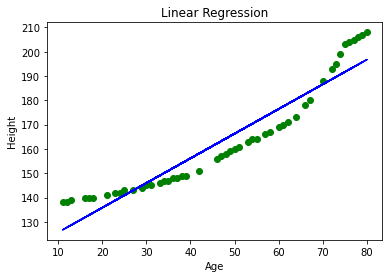

In [19]:
#visualise the linear regression results
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

In [20]:
#add polynomial term to linear model
from sklearn.preprocessing import PolynomialFeatures
polynum = PolynomialFeatures(degree = 2)
x_polynum = polynum.fit_transform(x_train)
x_polynum

array([[1.000e+00, 5.400e+01, 2.916e+03],
       [1.000e+00, 3.800e+01, 1.444e+03],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 6.400e+01, 4.096e+03],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 5.700e+01, 3.249e+03],
       [1.000e+00, 2.900e+01, 8.410e+02],
       [1.000e+00, 6.700e+01, 4.489e+03],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.900e+01, 2.401e+03],
       [1.000e+00, 2.300e+01, 5.290e+02],
       [1.000e+00, 8.000e+01, 6.400e+03],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 2.700e+01, 7.290e+02],
       [1.000e+00, 4.800e+01, 2.304e+03],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 6.600e+01, 4.356e+03],
       [1.000e+00, 1.600e+01, 2.560e+02],
       [1.000e+00, 4.600e+01, 2.116e+03],
       [1.000e+00, 7.500e+01, 5.625e+03],
       [1.000e+00, 7.300e+01, 5.329e+03],
       [1.000e+00, 7.900e+01, 6.24

In [21]:
#fit the polynomial regression model
pr = LinearRegression()
pr.fit(x_polynum, y_train)

LinearRegression()

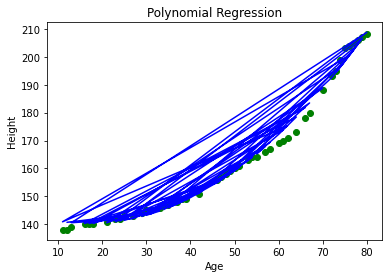

In [22]:
#visualise the polynomial regression results
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, pr.predict(x_polynum), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

In [23]:
#y_pred for polynomial regression
y_pred_pr = pr.predict(polynum.fit_transform(x_test))

In [24]:
#import r2 square for linear vs polynomial error comparison
from sklearn.metrics import r2_score

r_square_lr = r2_score(y_test, y_pred)
r_square_lr

#Accuracy of linear model is 84%

0.8445819943197981

In [25]:
r_square_pr = r2_score(y_test, y_pred_pr)
r_square_pr

#By using polynomial model, we increased the model accuracy from 84% to 98% 

0.9833978872226337

In [26]:
#predict random height using linear predict 
lr.predict([[53]])

array([169.33893353])

In [28]:
#predict random height using polynomial predict 
pr.predict(polynum.fit_transform([[53]]))

array([162.69944309])

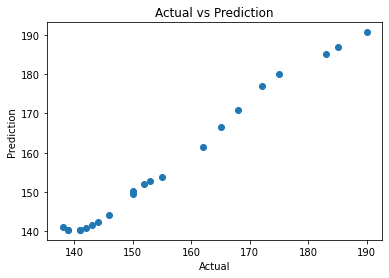

In [31]:
#Plot actual height against predicted height. 
plt.scatter(y_test, y_pred_pr)
plt.title('Actual vs Prediction')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

The scatter plot shows that the prediction height is almost similar to actual height.